In [3]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage


In [4]:
from keras.datasets.fashion_mnist import load_data
(trainX, trainy), (testX, testy) = load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)
 
m_train = trainX.shape[0]
num_px = trainX.shape[1]
m_test = testX.shape[0]


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


8


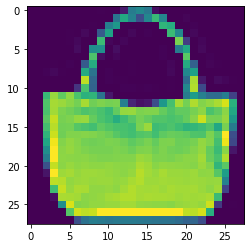

In [6]:

index = 100
plt.imshow(trainX[index])

output = trainy[index]
print(output)                  # 0 T-shirt/top  1 Trouser 2 Pullover 3 Dress 4 Coat 5 Sandal 6 Shirt 7 Sneaker 8 Bag 9 Ankle boot


In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

4
3
7
3


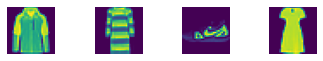

In [8]:
for i in range(0,4):
    ir=np.random.randint(0,trainX.shape[0])
    print(trainy[ir])
    fig = plt.subplot(4,4,i+1)
    fig.axis('off')
    img=trainX[ir]
    fig.imshow(img)

In [9]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras import optimizers

In [10]:

trainy = tf.keras.utils.to_categorical(trainy) 
testy = tf.keras.utils.to_categorical(testy)
trainX=trainX.reshape(trainX.shape[0],28,28,1) 
testX=testX.reshape(testX.shape[0],28,28,1)

trainX=trainX/255.
testX=testX/255.

print(trainX.shape)
print(trainy.shape)

(60000, 28, 28, 1)
(60000, 10)


In [11]:
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20)) 

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25))          

model.add(Flatten())
model.add(Dense(54, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [12]:
history = model.fit(trainX,trainy,
    epochs=5,batch_size=32,
    ) 

Epoch 1/5
1875/1875 [==============================] - 94s 40ms/step - loss: 0.9033 - accuracy: 0.6915
Epoch 2/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.5499 - accuracy: 0.8116
Epoch 3/5
1875/1875 [==============================] - 76s 40ms/step - loss: 0.4988 - accuracy: 0.8286
Epoch 4/5
1875/1875 [==============================] - 77s 41ms/step - loss: 0.4693 - accuracy: 0.8383
Epoch 5/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.4492 - accuracy: 0.8454


In [13]:
score = model.evaluate(testX, testy, verbose = 1) 


print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

313/313 [==============================] - 4s 11ms/step - loss: 0.3698 - accuracy: 0.8714
Test loss: 0.3698195815086365
Test accuracy: 0.871399998664856


(1, 28, 28, 1)
[[6.9546290e-03 1.3748603e-09 3.8245922e-01 4.5375632e-06 6.7857385e-04
  8.7590566e-09 5.9382284e-01 2.7454301e-09 1.6080234e-02 3.2567779e-10]]
6
Shirt


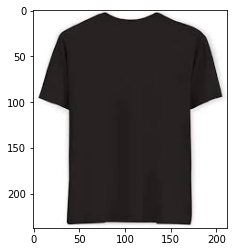

In [29]:
import cv2
image=cv2.imread('/content/download (1).jfif')
plt.imshow(image)

image=cv2.resize(image, (28,28))
image=image[:,:,0]
image=image.reshape(1,28,28,1)
image=image/255
print(image.shape)
pre=model.predict(image)
print(pre)
y_predicted_labels=[np.argmax(i) for i in pre]
print(y_predicted_labels[0])

labels = {0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat'
          ,5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}
print(labels[y_predicted_labels[0]])